# Vector Search at Scale: Cloud vs. Local DBs: Build a RAG App with Pinecone, LangChain & OpenAI

**Vamshi Krishna Ginna**  
_7 min read · Jun 1, 2025_

## 1. Introduction: The Search Problem LLMs Can’t Solve Alone

Large Language Models (LLMs) like GPT-4 can reason, write, and summarize — but they can’t **remember**. They don’t have persistent memory or context beyond a few thousand tokens. That’s where **vector databases** come in.

When you convert data (text, image, audio) into embeddings — a high-dimensional representation — LLMs can **retrieve** semantically similar content. This process powers **RAG (Retrieval-Augmented Generation)** and makes AI smarter, faster, and context-aware.

**But here’s the catch:**

> _Not all vector databases are created equal. Some are built for rapid prototyping. Others are built for the cloud._

Some (like FAISS or Chroma) are great for **local dev**, while others (like Pinecone or Weaviate) are battle-tested for **production** with cloud APIs, scaling, filtering, and hybrid search.

**In this blog, you’ll learn:**
- ☁️ Cloud-hosted vs. local vector DBs: Which is right for you?
- ⚡ KNN vs. ANN: How retrieval strategies impact speed and accuracy
- 🧠 Why real-world LLM apps demand scalable, multimodal search
- 🛠️ Hands-on: Build a semantic search + RAG app using **Pinecone + OpenAI + LangChain**

## 2. Cloud vs. Local Vector Databases: What’s the Difference?

When it comes to storing and querying vector embeddings, one of the first decisions you’ll make is **where** to run your database:  
🔹 **Locally** on your machine or server  
🔹 **In the cloud** with a managed API

Both approaches have pros and cons — let’s break them down.

### 2.1. Deployment Matrix

🧠 **Insight:**
- **Pinecone** is cloud-native and built for scale but has **no local deployment** option.
- **FAISS/Chroma** are ideal for quick local testing but lack enterprise features like horizontal scaling or distributed indexing.
- **Qdrant** and **Weaviate** offer the best of both worlds — local testing and cloud deployment with production-level performance.

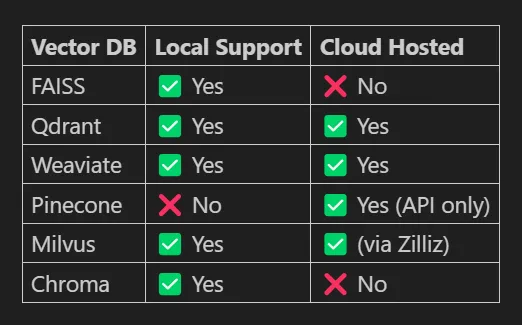

### 2.2. Trade-offs

_(Trade-offs not detailed in original text)_

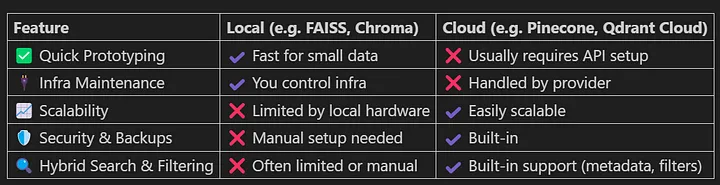

### 2.3. When to Use What?

**Use Local DBs (FAISS, Chroma):**
- In Jupyter notebooks or dev environments
- When cost is a constraint
- For fast experimentation

**Use Cloud DBs (Pinecone, Weaviate, Qdrant):**
- For RAG apps in production
- When handling millions of embeddings
- When you need multi-user access, uptime SLAs, and secure APIs

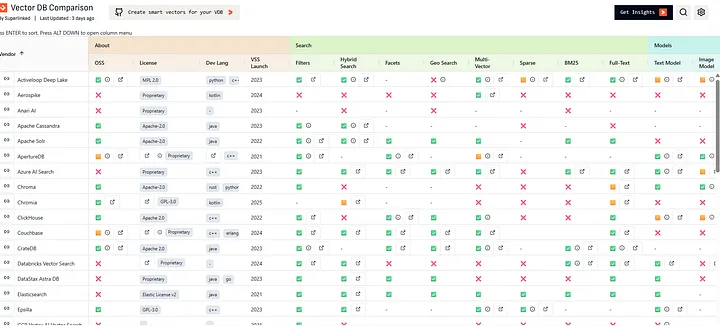

## 3. KNN vs. ANN: Speed vs. Precision in Vector Retrieval

Once your data is embedded into vectors and stored in a database, the next step is **retrieving similar vectors**. But how should the database decide which vectors are “closest”?

This is where two core search strategies come into play:

### 3.1. The Basics
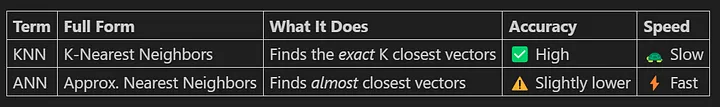

### 3.2. KNN: Precise, but Costly
- Exhaustively compares the query vector to **all** stored vectors.
- Delivers the most **accurate** results.
- Becomes slow and memory-intensive as dataset grows.
- **Suitable for**: Small datasets, Academic work, Situations where accuracy is critical

### 3.3. ANN: Speed Meets Scale
- Uses smart indexing techniques like **HNSW**, **IVF**, or **PQ**.
- Returns results that are _very close_ — but not mathematically perfect.
- Scales to millions of embeddings with **minimal latency**.
- **Suitable for:** Real-time applications, Semantic search at scale, Any production-grade vector DB (Pinecone, Weaviate, etc.)

### 3.4. Quick Analogy:
Imagine finding the 5 people closest to you in a stadium:
- **KNN** = check every single person.
- **ANN** = check every person in your section and return the closest.

**Takeaway:**
> _If you’re building a serious AI application,_ **_ANN is the default_** _— it’s how most modern vector DBs achieve real-time speed without compromising too much on quality._

# 4. Real-World LLM Use Cases Need More Than Just Text

In today’s AI landscape, information isn’t limited to plain text. Real applications need to work with:
- 📝 Text (emails, docs)
- 🖼️ Images (screenshots, scanned forms)
- 🔊 Audio (calls, voice notes)
- 🎥 Video (recordings, tutorials)
- 📊 Tables (spreadsheets, PDFs)

To support these, we need databases that understand **multimodal inputs** — and store them efficiently in **vector form**.

### 4.1. Multimodal Embedding Flow

📌 _Tables can also be summarized to plain text before embedding._

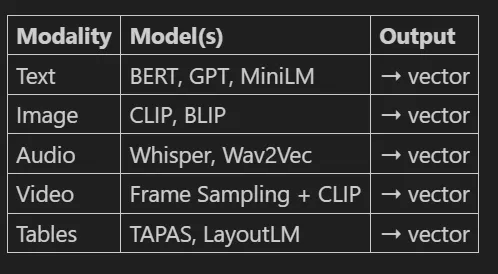

### 4.2. Use Case Examples

These aren’t future ideas — they’re being built today using tools like **LangChain**, **Pinecone**, and **OpenAI**.
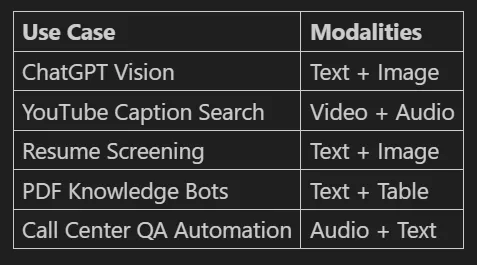

## 💡 Core Insight:
> _“The real magic isn’t in how we_ **_create_** _embeddings… it’s in how vector databases_ **_organize, index, and retrieve_** _them for scalable AI workflows.”_

This is what separates powerful cloud-hosted DBs like **Weaviate**, **Qdrant**, and **Pinecone** from local prototypes like FAISS and Chroma.

# 5. Hands-On: Build a Semantic Search + RAG App with Pinecone & LangChain

Now that we’ve explored the theory, let’s get our hands dirty.

**In this section, you’ll:**
- Generate vector embeddings using OpenAI
- Store them in Pinecone (cloud vector DB)
- Query similar content
- Build a simple RAG (Retrieval-Augmented Generation) pipeline

## Step 1: Create a Pinecone Account & API Key
1. Go to [https://www.pinecone.io](https://www.pinecone.io)
2. Sign up and navigate to **API Keys**
3. Copy your key and keep it safe — we’ll load it in `.env`

```
OPENAI_API_KEY=sk-xxxxxxxxxxxxx
PINECONE_API_KEY=xxxxxxxxxxxxx
```

## Step 2: Install Dependencies
```bash
pip install langchain-openai langchain-pinecone pinecone-client python-dotenv
```

In [ ]:
# Step 3: Code Walkthrough
# Load environment variables
import os
from dotenv import load_dotenv
load_dotenv()

In [ ]:
# 🔗 Initialize OpenAI Embeddings
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")
dimensions = len(embeddings.embed_query("Hello world!"))
print(f"Embedding Dimensions: {dimensions}")  # 3072

In [ ]:
# Initialize Pinecone Client
from pinecone import Pinecone, ServerlessSpec
pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))
index_name = "semantic-search-demo"
# Create index if it doesn't exist
if not pc.has_index(index_name):
    pc.create_index(
        name=index_name,
        dimension=dimensions,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )
index = pc.Index(index_name)

In [ ]:
# Create LangChain Vector Store
from langchain_pinecone import PineconeVectorStore
vector_store = PineconeVectorStore(index=index, embedding=embeddings)

In [ ]:
# 📄 Create Sample Documents
from langchain_core.documents import Document
from uuid import uuid4

docs = [
    Document(page_content="The best pancakes are made with buttermilk and love.", metadata={"type": "food"}),
    Document(page_content="Sushi spots are trending this summer in NYC.", metadata={"type": "review"}),
    Document(page_content="Apple launched a new chip with record-breaking battery life.", metadata={"type": "tech"}),
]
ids = [str(uuid4()) for _ in docs]
vector_store.add_documents(documents=docs, ids=ids)

> ✅ **Check your Pinecone dashboard!** You’ll now see the `semantic-search-demo` index populated with vectors.

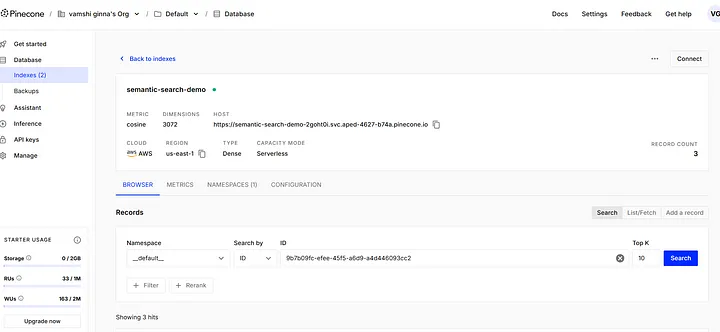

## Step 4: Run Semantic Search

In [ ]:
query = "Which places serve good sushi?"
results = vector_store.similarity_search(query, k=2)

print("Semantic Search Results:")
for doc in results:
    print(f"- {doc.page_content}")

## Step 5: Add an LLM for RAG

In [ ]:
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0)
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vector_store.as_retriever()
)

response = rag_chain.run("Tell me about breakfast foods.")
print(response)

```
Breakfast foods vary widely across different cultures, but some popular options include pancakes, which are often made with ingredients like buttermilk for added flavor and texture. Other common breakfast foods include eggs, bacon, cereal, toast, and pastries. In some cultures, breakfast might include rice, beans, or even soup. The key to a great breakfast often lies in the quality of the ingredients and the care put into preparation.
```

## Recap
You just built a **semantic search engine + RAG system** using:
- OpenAI Embeddings
- Pinecone for indexing
- LangChain for orchestration

You can expand this by embedding full documents, PDFs, product data, or resumes — and scaling this to production in minutes.

# 6. Conclusion: The Power of Search Starts with Vectors

If you’ve made it this far — congrats! You’ve just built a production-ready semantic search + RAG application using Pinecone, OpenAI, and LangChain.

In the era of LLMs and multimodal data, vector databases are no longer optional — they’re foundational. Whether you’re powering an AI assistant, a document Q&A tool, or a personalized recommendation system, **your choice of vector database matters**.

> _The real value lies not just in embedding — but in how you_ **_store, scale, and search_** _those embeddings._